學會從 Keras 內建函式取得資料

能夠建立簡易的深度學習模型

觀察並了解 Overfit 現象

In [1]:
import os
import tensorflow.keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()


In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = tensorflow.keras.layers.Input([x_train.shape[-1]])
    x = tensorflow.keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = tensorflow.keras.layers.Dense(units=256, activation="relu")(x)
    x = tensorflow.keras.layers.Dense(units=128, activation="relu")(x)
    out = tensorflow.keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 47us/sample - loss: 1.9576 - accuracy: 0.2971 - val_loss: 1.8271 - val_accuracy: 0.3576
Epoch 2/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.7076 - accuracy: 0.3867 - val_loss: 1.6669 - val_accuracy: 0.4045
Epoch 3/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.6267 - accuracy: 0.4163 - val_loss: 1.5940 - val_accuracy: 0.4363
Epoch 4/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5673 - accuracy: 0.4399 - val_loss: 1.5329 - val_accuracy: 0.4521
Epoch 5/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5056 - accuracy: 0.4627 - val_loss: 1.5200 - val_accuracy: 0.4638
Epoch 6/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.4674 - accuracy: 0.4776 - val_loss: 1.4955 - val_accuracy: 0.4711
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 2s 31us/sample - loss: 0.5582 - accuracy: 0.8015 - val_loss: 2.0080 - val_accuracy: 0.5135
Epoch 56/100
50000/50000 [==============================] - 2s 31us/sample - loss: 0.5696 - accuracy: 0.7955 - val_loss: 2.0106 - val_accuracy: 0.5169
Epoch 57/100
50000/50000 [==============================] - 2s 31us/sample - loss: 0.5532 - accuracy: 0.8023 - val_loss: 1.9523 - val_accuracy: 0.5135
Epoch 58/100
50000/50000 [==============================] - 2s 31us/sample - loss: 0.5504 - accuracy: 0.8009 - val_loss: 2.0264 - val_accuracy: 0.5135
Epoch 59/100
50000/50000 [==============================] - 2s 31us/sample - loss: 0.5429 - accuracy: 0.8052 - val_loss: 2.0501 - val_accuracy: 0.5159
Epoch 60/100
50000/50000 [==============================] - 2s 31us/sample - loss: 0.5218 - accuracy: 0.8136 - val_loss: 2.0826 - val_accuracy: 0.5210
Epoch 61/100
50000/50000 [==============================] - 2s 31us/sample - loss: 0.5076 - ac

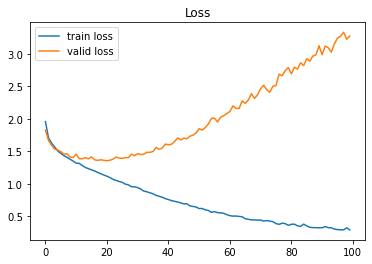

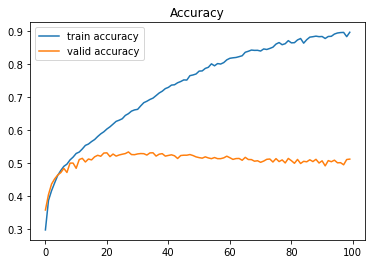

In [13]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

請將 Epoch 加到 500 個，並觀察 learning curve 的走勢

請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [14]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()


In [16]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

In [18]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, # 將 Epoch 設定成 500
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 45us/sample - loss: 2.2409 - accuracy: 0.1782 - val_loss: 2.1819 - val_accuracy: 0.2225
Epoch 2/500
50000/50000 [==============================] - 2s 30us/sample - loss: 2.1435 - accuracy: 0.2441 - val_loss: 2.1079 - val_accuracy: 0.2531
Epoch 3/500
50000/50000 [==============================] - 2s 30us/sample - loss: 2.0806 - accuracy: 0.2689 - val_loss: 2.0549 - val_accuracy: 0.2766
Epoch 4/500
50000/50000 [==============================] - 2s 31us/sample - loss: 2.0339 - accuracy: 0.2888 - val_loss: 2.0138 - val_accuracy: 0.2921
Epoch 5/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.9979 - accuracy: 0.3027 - val_loss: 1.9827 - val_accuracy: 0.3028
Epoch 6/500
50000/50000 [==============================] - 2s 31us/sample - loss: 1.9696 - accuracy: 0.3134 - val_loss: 1.9571 - val_accuracy: 0.3086
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.6418 - accuracy: 0.4272 - val_loss: 1.6484 - val_accuracy: 0.4257
Epoch 56/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.6387 - accuracy: 0.4292 - val_loss: 1.6459 - val_accuracy: 0.4235
Epoch 57/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.6356 - accuracy: 0.4307 - val_loss: 1.6426 - val_accuracy: 0.4280
Epoch 58/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.6326 - accuracy: 0.4324 - val_loss: 1.6399 - val_accuracy: 0.4273
Epoch 59/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.6296 - accuracy: 0.4334 - val_loss: 1.6367 - val_accuracy: 0.4294
Epoch 60/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.6266 - accuracy: 0.4330 - val_loss: 1.6355 - val_accuracy: 0.4271
Epoch 61/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.6239 - ac

50000/50000 [==============================] - 1s 29us/sample - loss: 1.5142 - accuracy: 0.4735 - val_loss: 1.5447 - val_accuracy: 0.4567
Epoch 110/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.5123 - accuracy: 0.4744 - val_loss: 1.5386 - val_accuracy: 0.4597
Epoch 111/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.5106 - accuracy: 0.4749 - val_loss: 1.5422 - val_accuracy: 0.4562
Epoch 112/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.5087 - accuracy: 0.4751 - val_loss: 1.5373 - val_accuracy: 0.4588
Epoch 113/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.5065 - accuracy: 0.4771 - val_loss: 1.5365 - val_accuracy: 0.4605
Epoch 114/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5052 - accuracy: 0.4777 - val_loss: 1.5344 - val_accuracy: 0.4604
Epoch 115/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.5031 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.4236 - accuracy: 0.5047 - val_loss: 1.4750 - val_accuracy: 0.4805
Epoch 164/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.4216 - accuracy: 0.5060 - val_loss: 1.4821 - val_accuracy: 0.4782
Epoch 165/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.4203 - accuracy: 0.5062 - val_loss: 1.4809 - val_accuracy: 0.4816
Epoch 166/500
50000/50000 [==============================] - 1s 27us/sample - loss: 1.4187 - accuracy: 0.5067 - val_loss: 1.4803 - val_accuracy: 0.4817
Epoch 167/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.4176 - accuracy: 0.5076 - val_loss: 1.4676 - val_accuracy: 0.4825
Epoch 168/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.4158 - accuracy: 0.5081 - val_loss: 1.4725 - val_accuracy: 0.4850
Epoch 169/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.41

Epoch 217/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.3457 - accuracy: 0.5313 - val_loss: 1.4351 - val_accuracy: 0.4971
Epoch 218/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.3445 - accuracy: 0.5307 - val_loss: 1.4244 - val_accuracy: 0.4979
Epoch 219/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.3434 - accuracy: 0.5316 - val_loss: 1.4205 - val_accuracy: 0.4949
Epoch 220/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.3417 - accuracy: 0.5331 - val_loss: 1.4209 - val_accuracy: 0.4971
Epoch 221/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.3403 - accuracy: 0.5342 - val_loss: 1.4240 - val_accuracy: 0.4961
Epoch 222/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.3391 - accuracy: 0.5332 - val_loss: 1.4259 - val_accuracy: 0.4893
Epoch 223/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.33

Epoch 271/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2768 - accuracy: 0.5540 - val_loss: 1.3997 - val_accuracy: 0.5113
Epoch 272/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2762 - accuracy: 0.5537 - val_loss: 1.3924 - val_accuracy: 0.5090
Epoch 273/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2745 - accuracy: 0.5551 - val_loss: 1.3899 - val_accuracy: 0.5043
Epoch 274/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2734 - accuracy: 0.5550 - val_loss: 1.3850 - val_accuracy: 0.5069
Epoch 275/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2725 - accuracy: 0.5553 - val_loss: 1.4239 - val_accuracy: 0.4985
Epoch 276/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.2714 - accuracy: 0.5559 - val_loss: 1.3870 - val_accuracy: 0.5112
Epoch 277/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.26

Epoch 325/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.2143 - accuracy: 0.5765 - val_loss: 1.3801 - val_accuracy: 0.5097
Epoch 326/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.2128 - accuracy: 0.5772 - val_loss: 1.3888 - val_accuracy: 0.5102
Epoch 327/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.2123 - accuracy: 0.5758 - val_loss: 1.3625 - val_accuracy: 0.5152
Epoch 328/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.2108 - accuracy: 0.5768 - val_loss: 1.3853 - val_accuracy: 0.5153
Epoch 329/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.2100 - accuracy: 0.5771 - val_loss: 1.3648 - val_accuracy: 0.5208
Epoch 330/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.2091 - accuracy: 0.5783 - val_loss: 1.3750 - val_accuracy: 0.5149
Epoch 331/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.20

Epoch 379/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.1560 - accuracy: 0.5962 - val_loss: 1.3553 - val_accuracy: 0.5155
Epoch 380/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.1540 - accuracy: 0.5971 - val_loss: 1.3798 - val_accuracy: 0.5127
Epoch 381/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.1534 - accuracy: 0.5986 - val_loss: 1.3498 - val_accuracy: 0.5227
Epoch 382/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.1514 - accuracy: 0.5983 - val_loss: 1.3648 - val_accuracy: 0.5159
Epoch 383/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.1509 - accuracy: 0.5978 - val_loss: 1.3445 - val_accuracy: 0.5253
Epoch 384/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.1503 - accuracy: 0.5982 - val_loss: 1.3594 - val_accuracy: 0.5179
Epoch 385/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.14

Epoch 433/500
50000/50000 [==============================] - 1s 27us/sample - loss: 1.1009 - accuracy: 0.6153 - val_loss: 1.3487 - val_accuracy: 0.5236
Epoch 434/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.0983 - accuracy: 0.6170 - val_loss: 1.3405 - val_accuracy: 0.5259
Epoch 435/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.0954 - accuracy: 0.6171 - val_loss: 1.3363 - val_accuracy: 0.5291
Epoch 436/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.0959 - accuracy: 0.6177 - val_loss: 1.3997 - val_accuracy: 0.5094
Epoch 437/500
50000/50000 [==============================] - 1s 28us/sample - loss: 1.0952 - accuracy: 0.6187 - val_loss: 1.3363 - val_accuracy: 0.5270
Epoch 438/500
50000/50000 [==============================] - 1s 29us/sample - loss: 1.0912 - accuracy: 0.6181 - val_loss: 1.3367 - val_accuracy: 0.5298
Epoch 439/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.09

Epoch 487/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.0428 - accuracy: 0.6359 - val_loss: 1.3708 - val_accuracy: 0.5162
Epoch 488/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.0434 - accuracy: 0.6353 - val_loss: 1.3306 - val_accuracy: 0.5338
Epoch 489/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.0431 - accuracy: 0.6363 - val_loss: 1.3690 - val_accuracy: 0.5222
Epoch 490/500
50000/50000 [==============================] - 1s 30us/sample - loss: 1.0405 - accuracy: 0.6370 - val_loss: 1.3464 - val_accuracy: 0.5207
Epoch 491/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.0409 - accuracy: 0.6364 - val_loss: 1.3379 - val_accuracy: 0.5265
Epoch 492/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.0401 - accuracy: 0.6363 - val_loss: 1.3408 - val_accuracy: 0.5309
Epoch 493/500
50000/50000 [==============================] - 2s 30us/sample - loss: 1.03

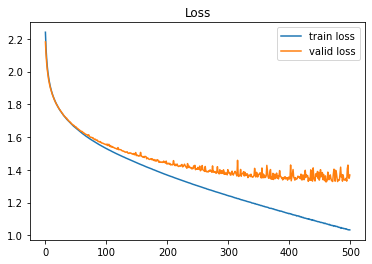

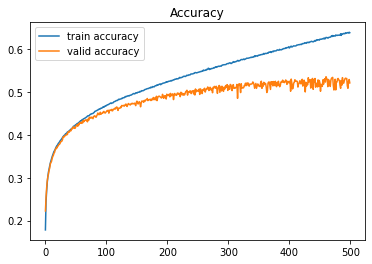

In [20]:
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()